In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons 
from pandas import DataFrame

In [3]:
#n es la dimension
#p es la cantidad de datasets
#k es la cantidad de centros que quiero 
#como esta en el enunciado


#inicializo con datos normales con centros random
def inicializar1(n,p,k,ndatos):
    #genero los datos
    i = 0 #esto es un contador
    muk = np.empty([k,n]) #estos son los mu
    data = np.empty([p,n,ndatos])
    #creo los datos, guardo los muko originales
    #creo los p set de datos
    while i < p: #por cada cluster de datos
        j = 0 #esto es otro contador
        while j < n: #por cada coordenada
            n1 = np.random.randint(100) 
            x = np.random.normal(n1,8,ndatos)
            data[i,j] = x
            j = j + 1 
        i = i+1
    i=0
    #creo los k muk aletoriamente
    while i < k:
        j = 0 #esto es otro contador
        while j < n:
            n1 = np.random.randint(100)
            muk[i,j] = n1
            j = j + 1 
        i = i+1
    #para el caso de n = 3 que es el del informe voy a graficar todo el dataset
    if n == 3:
        f = 0
        #x vs y
        plt.figure(1)
        while f < p:
            plt.xlabel("x")
            plt.ylabel("y")
            plt.scatter(data[f,0],data[f,1],label="clase "+str(f+1))
            plt.legend()
            plt.savefig('inicialxy.pdf')
            f = f + 1
        #x vs z
        plt.figure(2)
        f = 0
        while f < p:
            plt.xlabel("x")
            plt.ylabel("z")
            plt.scatter(data[f,0],data[f,2],label="clase "+str(f+1))
            plt.legend()
            plt.savefig('inicialxz.pdf')
            f = f + 1
        plt.figure(3)
        f = 0
        while f < p:
            plt.xlabel("y")
            plt.ylabel("z")
            plt.scatter(data[f,1],data[f,2],label="clase "+str(f+1))
            plt.savefig('inicialyz.pdf')
            plt.legend()
            f = f + 1
    #reshape de data para que quede como quiero (filas = data, columnas = dimensiones)
    data = np.hstack(data)
    data = np.transpose(data)
    return muk,data


In [ ]:
#n es la dimension
#p es la cantidad de datasets
#como esta en el enunciado


def inicializar2(n,p,k,ndatos):
    x,y = make_moons(n_samples=ndatos, noise=0.01)
    df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', color=colors[key])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Dataset inicial")
    plt.savefig('ej2inic.pdf')
    muk = np.empty([k,n])
    i = 0
    while i < k:
        muk[i,0] = np.random.rand()
        muk[i,1] = np.random.rand()
        i = i+1
    return muk,x



In [ ]:
#kmeans version 2, despues de usar las herramientas de numpy
#del problema 3 que vimos en clase

#n es la dimension
#p es la cantidad de datasets
#k es la cantidad de grupos que quiero tener
#como esta en el enunciado


def kmeans2(n,p,k,ndatos):
    #primer paso, inicializo
    #"primer paso: partimos de un conjunto de medias y datos"
    muk,data = inicializar2(n,p,k,ndatos)
    mukv = np.zeros([k,n])
    dist = np.linalg.norm(mukv-muk)
    itmax = 100
    it = 0
    while dist > 0.001 and it != itmax:
        #"segundo paso: asignamos clusters"
        resta = data - muk[:,np.newaxis] #resta datos - medias actuales
        normas = np.linalg.norm(resta,axis=2) #calcula norma de esos vectores
        idmin = np.argmin(normas,axis=0) #saca para cada cual es minimo, codifica clusters
        i = 0 #esto es un contador
        plt.figure(it+2)
        while i < p:
            plt.title("Iteración"+str(it))
            plt.scatter(data[idmin==i,0],data[idmin==i,1])
            plt.scatter(muk[i,0],muk[i,1],s=200,marker="*")
            plt.xlabel("x")
            plt.ylabel("y")
            i = i+1
        plt.savefig("Iteracion "+str(it)+".pdf")
        #"tercer paso: se vuelve a calcular la media para cada cluster"
        mukv = np.copy(muk) #aca guardo los means viejos
        i = 0
        while i < p:
            muk[i,:] = np.mean(data[idmin==i],axis=0)
            i = i+1
        it = it +1 #contamos las iteraciones
        dist = np.linalg.norm(mukv-muk)
        #grafica si ya ve que converge la cosa o se va el num de iteraciones
        if dist <= 0.001 or it == itmax:
            plt.figure(it+2+1)
            resta = data - muk[:,np.newaxis] #resta datos - medias actuales
            normas = np.linalg.norm(resta,axis=2) #calcula norma de esos vectores
            idmin = np.argmin(normas,axis=0) #saca para cada cual es minimo, codifica clusters
            i = 0
            while i < k:
                plt.scatter(data[idmin==i,0],data[idmin==i,1])
                plt.scatter(muk[i,0],muk[i,1],s=200,marker="*")
                i = i+1
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Estado final, después de "+str(it)+" iteraciones")
            plt.show()
            plt.savefig("estado final.pdf")
    #mensaje al final si no converge
    if(it == itmax):
        print("Superadas mas de 100 iteraciones no converge!")
    
#n = 2 dim
#p = 2 datasets
# k= 2 conjuntos a separar
# ndatos = 100 datos
kmeans2(2,2,2,100)


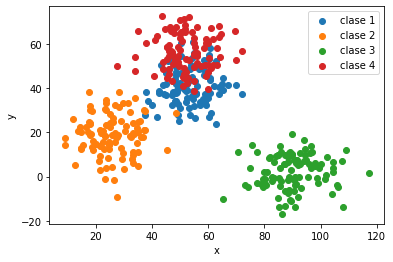

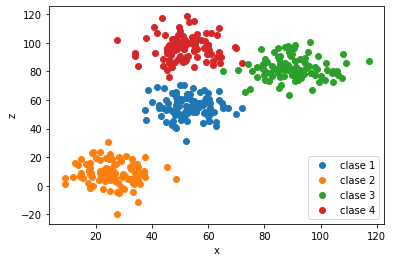

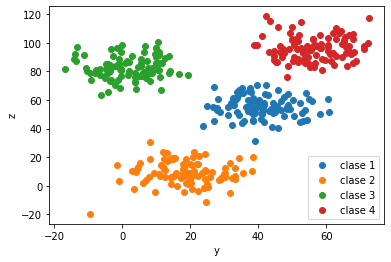

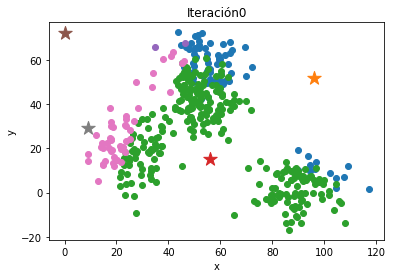

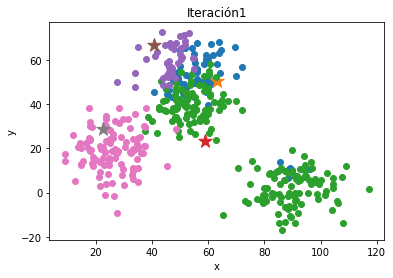

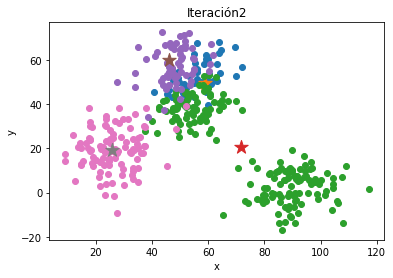

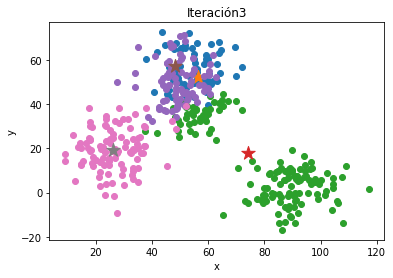

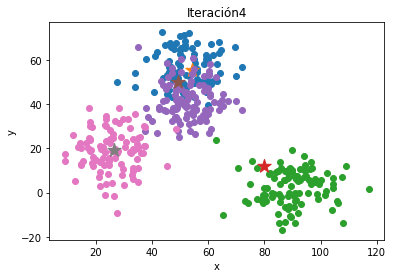

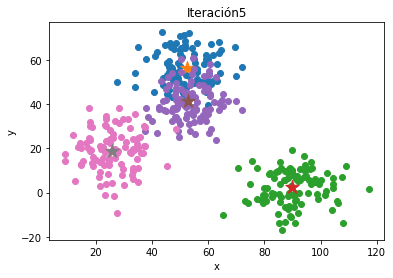

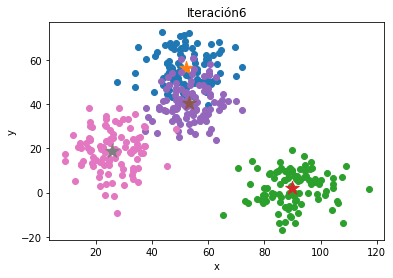

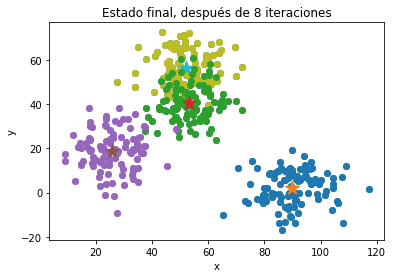

<Figure size 432x288 with 0 Axes>

In [6]:
#kmeans version 2, despues de usar las herramientas de numpy
#del problema 3 que vimos en clase
#Esto es para inicializar1, para un tipo de conjunto a generar

#n es la dimension
#p es la cantidad de datasets
#k es la cantidad de grupos que quiero tener
#como esta en el enunciado


def kmeans1(n,p,k,ndatos):
    #primer paso, inicializo
    #"primer paso: partimos de un conjunto de medias y datos"
    muk,data = inicializar1(n,p,k,ndatos)
    mukv = np.zeros([k,n])
    dist = np.linalg.norm(mukv-muk)
    itmax = 100
    it = 0
    while dist > 0.001 and it != itmax:
        #"segundo paso: asignamos clusters"
        resta = data - muk[:,np.newaxis] #resta datos - medias actuales
        normas = np.linalg.norm(resta,axis=2) #calcula norma de esos vectores
        idmin = np.argmin(normas,axis=0) #saca para cada cual es minimo, codifica clusters
        i = 0 #esto es un contador
        plt.figure(it+4) #es para graficar y no se me superponga en el caso este que ya tengo 3 graficos de antes
        while i < k:
            plt.title("Iteración"+str(it))
            plt.scatter(data[idmin==i,0],data[idmin==i,1])
            plt.scatter(muk[i,0],muk[i,1],s=200,marker="*")
            plt.xlabel("x")
            plt.ylabel("y")
            i = i+1
        plt.savefig("Iteracion "+str(it)+".pdf")
        #"tercer paso: se vuelve a calcular la media para cada cluster"
        mukv = np.copy(muk) #aca guardo los means viejos
        i = 0
        while i < k:
            muk[i,:] = np.mean(data[idmin==i],axis=0)
            i = i+1
        it = it +1 #contamos las iteraciones
        dist = np.linalg.norm(mukv-muk)
        #grafica si ya ve que converge la cosa o se va el num de iteraciones
        if dist <= 0.001 or it == itmax:
            plt.figure(it+2+1)
            resta = data - muk[:,np.newaxis] #resta datos - medias actuales
            normas = np.linalg.norm(resta,axis=2) #calcula norma de esos vectores
            idmin = np.argmin(normas,axis=0) #saca para cada cual es minimo, codifica clusters
            i = 0
            while i < k:
                plt.scatter(data[idmin==i,0],data[idmin==i,1])
                plt.scatter(muk[i,0],muk[i,1],s=200,marker="*")
                i = i+1
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("Estado final, después de "+str(it)+" iteraciones")
            plt.show()
            plt.savefig("estado final.pdf")
    #mensaje al final si no converge
    if(it == itmax):
        print("Superadas mas de 100 iteraciones no converge!")
    
#n = 3 dim
#p = 4 datasets
# k= 4 conjuntos a separar
# ndatos = 100 datos
kmeans1(3,4,4,100)
